Code to generate Figure 1 in the Supplementary Material, illustrating the convergence of training and validation metrics over epochs.


Metric                Train Start    Train End      Train Δ    Val Start      Val End        Val Δ
----------------------------------------------------------------------------------------------
Loss                        0.528        0.360       -0.169        0.457        0.370       -0.086
F1-score                    0.534        0.763        0.229        0.635        0.752        0.117
Hamming Distance            0.295        0.177       -0.118        0.249        0.186       -0.063


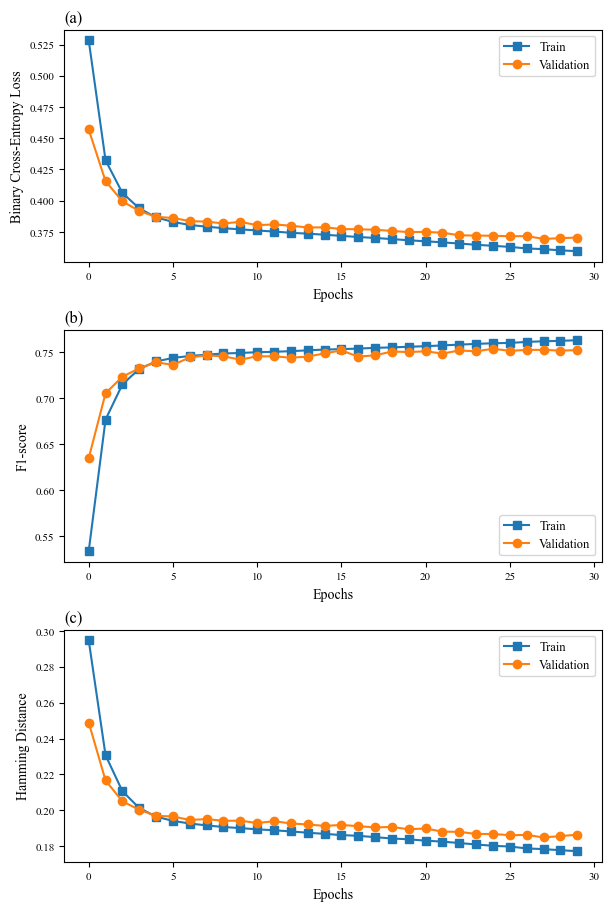

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


# Set font and backend config to ensure Type 1 or embedded TrueType fonts
rcParams.update({
    "text.usetex": False,  # Don't require LaTeX installation
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 9
})


# Load averaged training metrics
metrics_path = '../artifacts/metrics/averaged_training_metrics.npz' 
metrics = np.load(metrics_path)

# Extract metrics
train_loss = metrics["train_loss"]
val_loss = metrics["val_loss"]
train_f1 = metrics["train_f1"]
val_f1 = metrics["val_f1"]
train_hamming = metrics["train_hamming"]
val_hamming = metrics["val_hamming"]

# Helper function to compute summary
def summarize_progress(name, train, val):
    summary = {
        "Metric": name,
        "Train Start": train[0],
        "Train End": train[-1],
        "Train Change": train[-1] - train[0],
        "Val Start": val[0],
        "Val End": val[-1],
        "Val Change": val[-1] - val[0],
    }
    return summary

# Generate summaries
summaries = [
    summarize_progress("Loss", train_loss, val_loss),
    summarize_progress("F1-score", train_f1, val_f1),
    summarize_progress("Hamming Distance", train_hamming, val_hamming),
]

# Print header
print("\n{:<20} {:>12} {:>12} {:>12} {:>12} {:>12} {:>12}".format(
    "Metric", "Train Start", "Train End", "Train Δ", "Val Start", "Val End", "Val Δ"))
print("-" * 94)

# Print rows
for s in summaries:
    print("{:<20} {:>12.3f} {:>12.3f} {:>12.3f} {:>12.3f} {:>12.3f} {:>12.3f}".format(
        s["Metric"], s["Train Start"], s["Train End"], s["Train Change"],
        s["Val Start"], s["Val End"], s["Val Change"]
    ))
    

# Create figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 9), constrained_layout=True)

# Colors and markers: chosen for print safety (colorblind + grayscale safe)
color_train = '#1f77b4'  # dark blue
color_val = '#ff7f0e'    # dark orange
marker_train = 's'
marker_val = 'o'

# Plot Binary Cross-Entropy Loss
axs[0].plot(train_loss, marker=marker_train, label="Train", color=color_train)
axs[0].plot(val_loss, marker=marker_val, label="Validation", color=color_val)
axs[0].set_ylabel("Binary Cross-Entropy Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_title("(a)", loc='left')
axs[0].legend()

# Plot F1-score
axs[1].plot(train_f1, marker=marker_train, label="Train", color=color_train)
axs[1].plot(val_f1, marker=marker_val, label="Validation", color=color_val)
axs[1].set_ylabel("F1-score")
axs[1].set_xlabel("Epochs")
axs[1].set_title("(b)", loc='left')
axs[1].legend()

# Plot Hamming Distance
axs[2].plot(train_hamming, marker=marker_train, label="Train", color=color_train)
axs[2].plot(val_hamming, marker=marker_val, label="Validation", color=color_val)
axs[2].set_ylabel("Hamming Distance")
axs[2].set_xlabel("Epochs")
axs[2].set_title("(c)", loc='left')
axs[2].legend()

# Save as PDF with backend='cairo' to enforce proper font embedding
fig.savefig("../results/train_val_visualization.pdf", dpi=600, bbox_inches='tight', backend='cairo')
plt.show()

